#### Importing Libraries

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPool2D,Flatten

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

###### Buliding CNN


In [34]:
cl=Sequential() 

In [35]:
# convolution layer - 32 feature detectors of 3x3 shape plus a rectifier on top of our convolved feature map
cl.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [36]:
# max pooling layer - of 2x2 shape
cl.add(MaxPool2D(pool_size=(2,2)))

In [37]:
#another convolution layer
cl.add(Conv2D(32,(3,3),activation='relu'))

In [38]:
#another max pooling layer
cl.add(MaxPool2D(pool_size=(2,2)))

In [39]:
#flattening layer
cl.add(Flatten())

In [40]:
#Fully Connected Layer
cl.add(Dense(units=128,activation='relu'))

In [41]:
#Output Layer
cl.add(Dense(units=1,activation='sigmoid'))

###### Compiling CNN

In [42]:
cl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

###### Image Augmentation

In [43]:
trainaug=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3,horizontal_flip=True)

In [44]:
testaug=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3,horizontal_flip=True)

In [45]:
trainingset=trainaug.flow_from_directory(directory="G:\\data science skillathon\\all data\\cats vs dogs\\train", target_size=(64, 64),batch_size=32,class_mode='binary')

Found 20000 images belonging to 2 classes.


In [46]:
validationset=testaug.flow_from_directory(directory="G:\\data science skillathon\\all data\\cats vs dogs\\test", target_size=(64, 64),batch_size=32,class_mode='binary')

Found 5000 images belonging to 2 classes.


In [26]:
# by creating checkpoint

from keras.callbacks import ModelCheckpoint

filepath = "G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-{epoch:02d}-{loss: .4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
cl.fit_generator(trainingset,
                         steps_per_epoch=10000,                         
                         epochs=50,                                 
                         validation_data=validationset,
                         validation_steps=2500,                         
                         callbacks=callbacks_list)                   

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
10000/10000 [==============================] - 4358s 436ms/step - loss: 0.4435 - acc: 0.7873 - val_loss: 0.3916 - val_acc: 0.8196

Epoch 00001: loss improved from inf to 0.44346, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-01- 0.4435.hdf5
Epoch 2/50
10000/10000 [==============================] - 3485s 349ms/step - loss: 0.3284 - acc: 0.8542 - val_loss: 0.3819 - val_acc: 0.8362

Epoch 00002: loss improved from 0.44346 to 0.32841, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-02- 0.3284.hdf5
Epoch 3/50
10000/10000 [==============================] - 5427s 543ms/step - loss: 0.2693 - acc: 0.8843 - val_loss: 0.4085 - val_acc: 0.8330

Epoch 00003: loss improved from 0.32841 to 0.26928, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-03- 0.2693.hdf5
Epoch 4/50
10000/10000 [===========

In [ ]:
from keras.models import load_model
new_model = load_model('G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-05- 0.1960.hdf5')
new_model.fit_generator(trainingset,
                         steps_per_epoch=10000,                         
                         epochs=46,                                 
                         validation_data=validationset,
                         validation_steps=2500,                         
                         callbacks=callbacks_list)                   

Epoch 1/46
10000/10000 [==============================] - 5357s 536ms/step - loss: 0.1676 - acc: 0.9323 - val_loss: 0.4845 - val_acc: 0.8384

Epoch 00001: loss improved from inf to 0.16761, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-01- 0.1676.hdf5
Epoch 2/46
10000/10000 [==============================] - 5860s 586ms/step - loss: 0.1433 - acc: 0.9431 - val_loss: 0.5047 - val_acc: 0.8346

Epoch 00002: loss improved from 0.16761 to 0.14334, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-02- 0.1433.hdf5
Epoch 3/46
10000/10000 [==============================] - 5016s 502ms/step - loss: 0.1263 - acc: 0.9508 - val_loss: 0.5182 - val_acc: 0.8309

Epoch 00003: loss improved from 0.14334 to 0.12625, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-03- 0.1263.hdf5
Epoch 4/46
 9268/10000 [==========================>...] - ETA: 5:56 - loss: 0.1131 

In [27]:
from keras.models import load_model
new_model1 = load_model('G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-03- 0.1263.hdf5')
new_model1.fit_generator(trainingset,
                         steps_per_epoch=10000,                         
                         epochs=42,                                 
                         validation_data=validationset,
                         validation_steps=2500,                         
                         callbacks=callbacks_list) 

Epoch 1/42
10000/10000 [==============================] - 3350s 335ms/step - loss: 0.1124 - acc: 0.9568 - val_loss: 0.5651 - val_acc: 0.8363

Epoch 00001: loss improved from inf to 0.11235, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-01- 0.1124.hdf5
Epoch 2/42
10000/10000 [==============================] - 2833s 283ms/step - loss: 0.1019 - acc: 0.9608 - val_loss: 0.5892 - val_acc: 0.8344

Epoch 00002: loss improved from 0.11235 to 0.10188, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-02- 0.1019.hdf5
Epoch 3/42
10000/10000 [==============================] - 2852s 285ms/step - loss: 0.0918 - acc: 0.9653 - val_loss: 0.6075 - val_acc: 0.8398

Epoch 00003: loss improved from 0.10188 to 0.09183, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-03- 0.0918.hdf5
Epoch 4/42
10000/10000 [==============================] - 3393s 339ms/step - loss: 

10000/10000 [==============================] - 2870s 287ms/step - loss: 0.0333 - acc: 0.9882 - val_loss: 0.9805 - val_acc: 0.8351

Epoch 00028: loss improved from 0.03376 to 0.03333, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-28- 0.0333.hdf5
Epoch 29/42
10000/10000 [==============================] - 2882s 288ms/step - loss: 0.0331 - acc: 0.9882 - val_loss: 0.9445 - val_acc: 0.8375

Epoch 00029: loss improved from 0.03333 to 0.03311, saving model to G:/data science skillathon/all data/cats vs dogs/saved_model/weights-improvement-29- 0.0331.hdf5
Epoch 30/42
 3480/10000 [=========>....................] - ETA: 28:42 - loss: 0.0336 - acc: 0.9880

KeyboardInterrupt: 

##### Testing our CNN Model

In [60]:
# what do these 0s and 1s actually refer to?
trainingset.class_indices

{'cats': 0, 'dogs': 1}

In [135]:
def test_unseen(filename):
    test_image =  image.load_img(filename, target_size = (64, 64))
    # converting to a 3D array
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = new_model1.predict(test_image)
    
    if result[0][0] == 1:
        prediction = "Dogs detected!"
    else:
        prediction = "Cats detected!"
        
    return prediction

In [159]:
filename = "G:\\data science skillathon\\all data\\cats vs dogs\\unseentestingset\\12499.jpg"
test_unseen(filename)


'Dogs detected!'

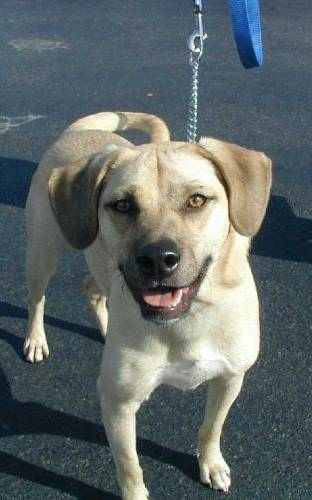

In [160]:
Image(filename='G:\\data science skillathon\\all data\\cats vs dogs\\unseentestingset\\12499.jpg')

In [163]:
filename = "G:\\data science skillathon\\all data\\cats vs dogs\\unseentestingset\\122.jpg"
test_unseen(filename)


'Cats detected!'

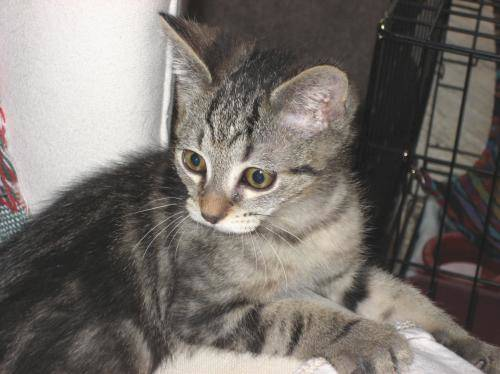

In [164]:
Image(filename="G:\\data science skillathon\\all data\\cats vs dogs\\unseentestingset\\122.jpg")